C:\Users\ilker\AppData\Local\Temp\ipykernel_27140\1982367347.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


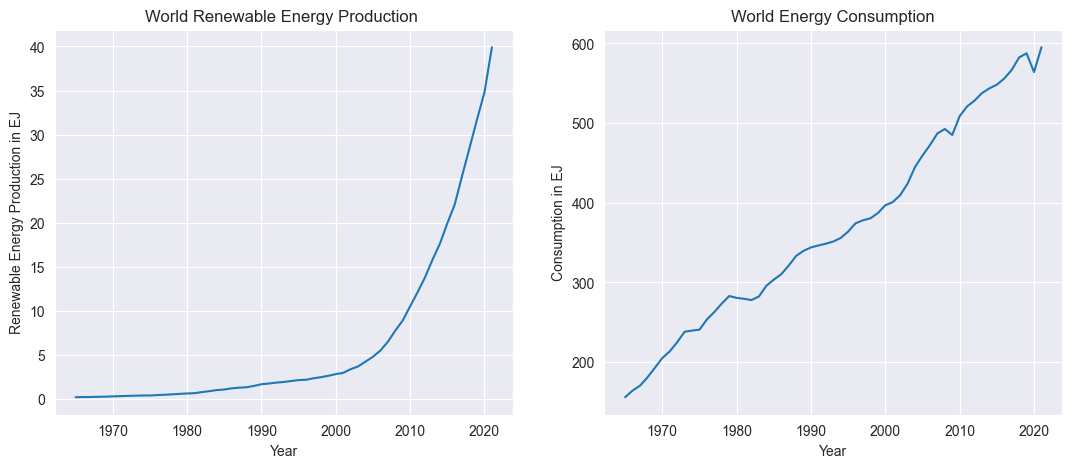

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataFrame = pd.read_csv("bpPanel.csv")
dataFrame.dropna(subset=['renewables_ej','solar_ej','wind_ej'],inplace=True)
dataFrame.dropna(subset=['Year'],inplace=True)
dataFrame.dropna(subset=['renewables_ej'],inplace=True)
dataFrame.sort_values(by=['renewables_ej'],inplace=True,ascending=False)
dataFrame = dataFrame[dataFrame["Country"].str.contains("Total World")==True]

fig, ax =plt.subplots(1,2)
fig.set_size_inches(13,5)
sns.lineplot(data=dataFrame,x="Year",y="renewables_ej",ax=ax[0]).set(title='World Renewable Energy Production ',ylabel='Renewable Energy Production in EJ')
sns.lineplot(data=dataFrame,x="Year",y="primary_ej",ax=ax[1]).set(title='World Energy Consumption',ylabel='Consumption in EJ')
fig.show()




In [1]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
dataFrame = pd.read_csv("bpPanel.csv")
dataFrame.dropna(subset=['Year'],inplace=True)
dataFrame.dropna(subset=['renewables_ej'],inplace=True)
dataFrame.sort_values(by=['renewables_ej'],inplace=True,ascending=False)
dataFrame = dataFrame[dataFrame["Country"].str.contains("World")==True]
dataFrame.Year.astype('int32')
dataFrame.Year=pd.to_datetime(dataFrame.Year,format='%Y')
dataFrame=dataFrame.set_index(dataFrame.Year)

df_stationarityTest = adfuller(dataFrame["renewables_ej"], autolag='AIC')
print("P-value: ", df_stationarityTest[1])



train_data = dataFrame['renewables_ej'][:len(dataFrame)-100]
test_data = dataFrame['renewables_ej'][len(dataFrame)-100:]

ar_model = AutoReg(train_data, lags=2).fit()
print(ar_model.summary())

pred = ar_model.predict(start=len(train_data), end=(len(dataFrame)-1), dynamic=True)


P-value:  0.0041176796849285114
                            AutoReg Model Results                             
Dep. Variable:          renewables_ej   No. Observations:                   14
Model:                     AutoReg(2)   Log Likelihood                   1.484
Method:               Conditional MLE   S.D. of innovations              0.214
Date:                Wed, 04 Jan 2023   AIC                              5.032
Time:                        20:17:54   BIC                              6.972
Sample:                             2   HQIC                             4.314
                                   14                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7193      0.173     -4.154      0.000      -1.059      -0.380
renewables_ej.L1     0.5808      0.163      3.565      0.000       0.261       0.

C:\Users\ilker\PycharmProjects\Project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\ilker\PycharmProjects\Project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ilker\PycharmProjects\Project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ilker\PycharmProjects\Project\venv\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will conta

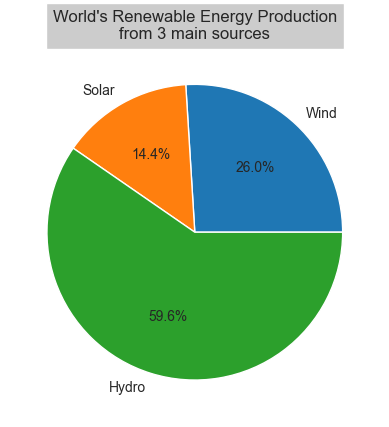

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataFrame=pd.read_csv("bpPanel.csv")
dataFrame = dataFrame[dataFrame["Country"].str.contains("Total World")==True]
for row in dataFrame.index:
    if dataFrame.at[row,"Year"]!=2021:
        dataFrame.drop(row,inplace=True)
dataFrame = dataFrame[["wind_ej","solar_ej","hydro_ej"]]

a=dataFrame["wind_ej"].iloc[0]
b=dataFrame["solar_ej"].iloc[0]
c=dataFrame["hydro_ej"].iloc[0]

y=np.array([a,b,c])
mylabels=["Wind","Solar","Hydro"]

plt.pie(y,labels=mylabels,autopct='%.1f%%')
plt.title("World's Renewable Energy Production\nfrom 3 main sources", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

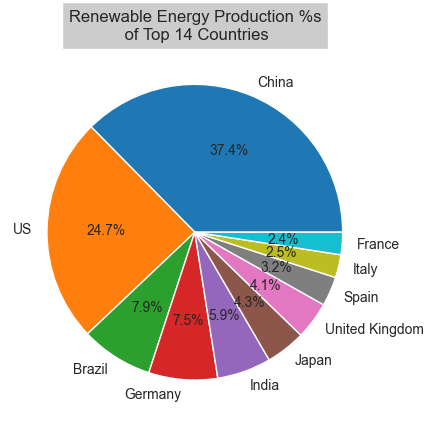

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

dataFrame=pd.read_csv('bpPanel.csv')
dataFrame.dropna(subset=['Year'],inplace=True)
dataFrame.dropna(subset=['renewables_ej'],inplace=True)
dataFrame.sort_values(by=['renewables_ej'],inplace=True,ascending=False)
dataFrame = dataFrame[dataFrame["Country"].str.contains("Total")==False]
dataFrame = dataFrame[dataFrame["Country"].str.contains("America")==False]
for row in dataFrame['Year'].index:
    if dataFrame.at[row,'Year'] != 2021:
        dataFrame.drop(row,inplace=True)
for row in dataFrame['renewables_ej'].index:
    if dataFrame.at[row,'renewables_ej'] <0.65:
        dataFrame.drop(row,inplace=True)

plt.pie(dataFrame['renewables_ej'],labels=dataFrame['Country'],autopct='%.1f%%')
plt.title("Renewable Energy Production %s\n of Top 14 Countries", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

C:\Users\ilker\PycharmProjects\Project\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


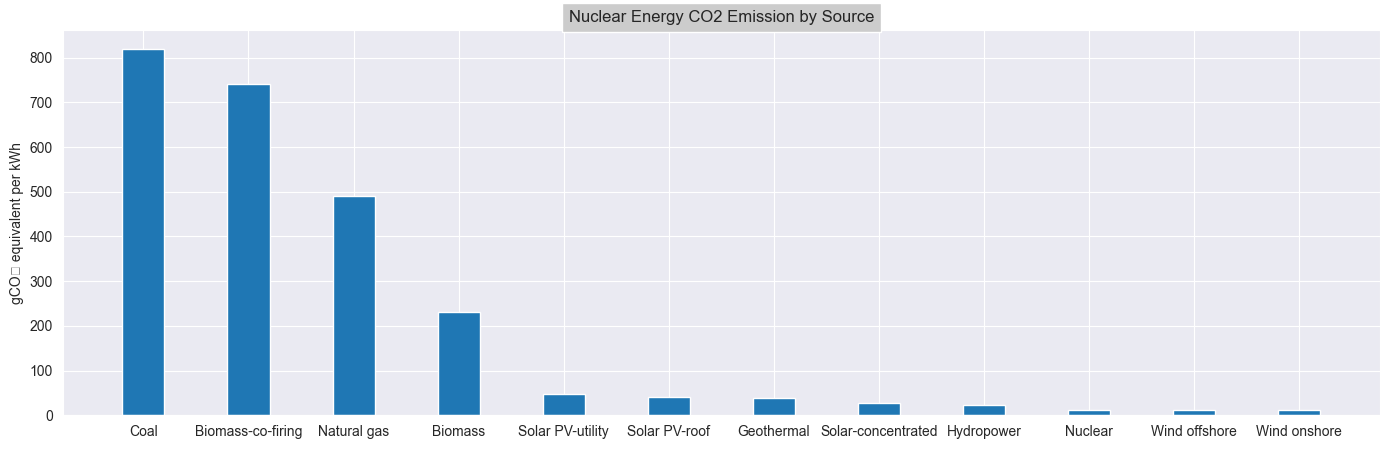

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Nuclear.csv")
fig = plt.figure(figsize = (17, 5))
plt.bar(df["Entity"], df["gco_per_kwh"],width = 0.4)
plt.title("Nuclear Energy CO2 Emission by Source", bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel("gCO₂ equivalent per kWh")

plt.show()


      primary_ej  Year
6373  155.883294  1965
6374  164.202561  1966
6375  170.384569  1967
6376  180.693260  1968
6377  192.815023  1969


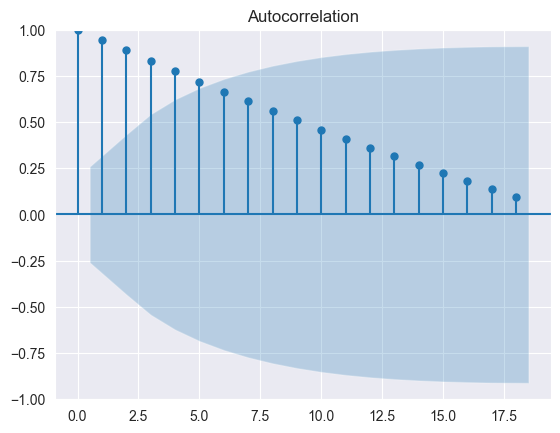

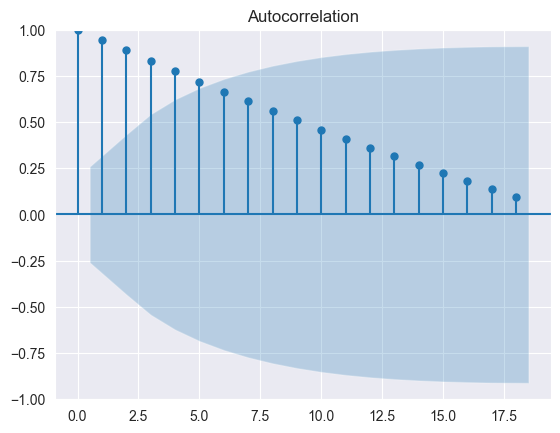

In [4]:
dataFrame=pd.read_csv("bpPanel.csv")
dataFrame = dataFrame[dataFrame["Country"].str.contains("Total World")==True]
dataFrame=dataFrame[["primary_ej","Year"]]

print(dataFrame.head())

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataFrame.primary_ej)


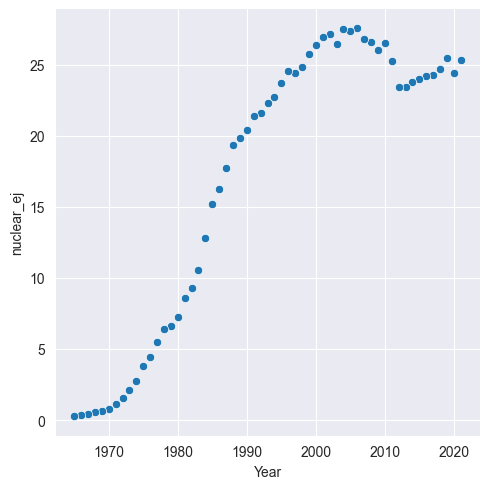

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataFrame = pd.read_csv("bpPanel.csv")
dataFrame.dropna(subset=['renewables_ej','solar_ej','wind_ej'],inplace=True)
dataFrame.dropna(subset=['Year'],inplace=True)
dataFrame.dropna(subset=['renewables_ej'],inplace=True)
dataFrame.sort_values(by=['renewables_ej'],inplace=True,ascending=False)
dataFrame = dataFrame[dataFrame["Country"].str.contains("World")==True]


sns.relplot(data=dataFrame,x="Year",y="nuclear_ej")
plt.show()

C:\Users\ilker\AppData\Local\Temp\ipykernel_27140\28125416.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(row,inplace=True)
C:\Users\ilker\AppData\Local\Temp\ipykernel_27140\28125416.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(row,inplace=True)
C:\Users\ilker\AppData\Local\Temp\ipykernel_27140\28125416.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(row,inplace=True)
C:\Users\ilker\AppData\Lo

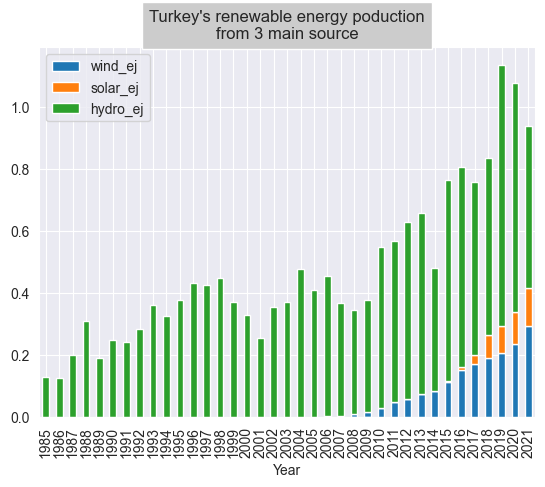

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataFrame=pd.read_csv("bpPanel.csv")
dataFrame = dataFrame[dataFrame["Country"].str.contains("Turkey")==True]
df = dataFrame[['Country',"Year","wind_ej","solar_ej","hydro_ej"]]
for row in df.index:
    if df.at[row,"Year"]<1985:
        df.drop(row,inplace=True)


df.plot(x="Year",kind="bar",stacked=True)
plt.title("Turkey's renewable energy poduction\nfrom 3 main source", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Entity
Code
Year
Primary energy consumption per GDP
GDP per capita
Continent


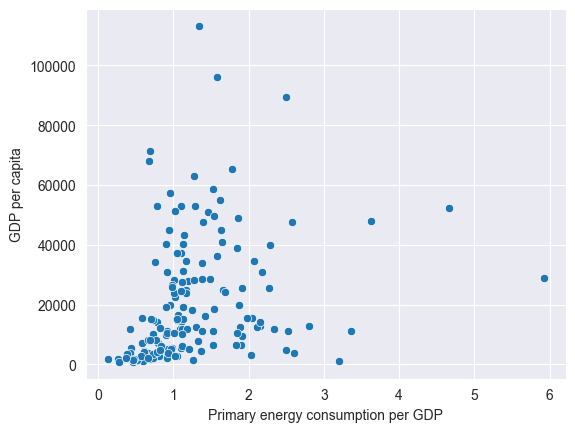

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataFrame = pd.read_csv("gdp.csv")
for col in dataFrame.columns:
    print(col)
dataFrame.dropna(subset=["Primary energy consumption per GDP","GDP per capita"],inplace=True)
dataFrame.sort_values(by=["Year"],ascending=False,inplace=True)


for row in dataFrame['Year'].index:
    if dataFrame.at[row,'Year'] != 2015:
        dataFrame.drop(row,inplace=True)


fig = sns.scatterplot(data=dataFrame,x="Primary energy consumption per GDP",y="GDP per capita")
plt.subplots_adjust(left=0.15)
plt.show()